# 미니프로젝트 샘플자료
1. 필요한 라이브러리 목록
<ol>
    <li>데이터베이스: cx_Oracle</li>
    <li>서버: flask</li>
    <li>분석: numpy, pandas, matplotlib, seaborn</li>
</ol>


In [2]:
!pip install flask

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from flask import * 

In [ ]:
app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/page')
def page():
    no = request.args.get('name', type=str)
    print(no)
    return render_template('page'+no+'.html')

@app.route('/result')
def result():
    return render_template('index.html')

app.run(host='127.0.0.1', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [10/Jan/2025 15:25:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Jan/2025 15:25:14] "GET /page?name=0 HTTP/1.1" 200 -


0


127.0.0.1 - - [10/Jan/2025 16:36:24] "GET /page?name=1 HTTP/1.1" 200 -
127.0.0.1 - - [10/Jan/2025 16:36:24] "GET /static/map.PNG HTTP/1.1" 304 -


1


127.0.0.1 - - [10/Jan/2025 16:36:37] "GET /page?name=2 HTTP/1.1" 200 -
127.0.0.1 - - [10/Jan/2025 16:36:37] "GET /static/Report%20column.PNG HTTP/1.1" 304 -
127.0.0.1 - - [10/Jan/2025 16:36:37] "GET /static/2023%20인구수..jpg HTTP/1.1" 304 -


2


127.0.0.1 - - [10/Jan/2025 16:36:48] "GET /page?name=3 HTTP/1.1" 200 -
127.0.0.1 - - [10/Jan/2025 16:36:48] "GET /static/COLUMN.PNG HTTP/1.1" 304 -


3


127.0.0.1 - - [10/Jan/2025 16:37:12] "GET /page?name=4 HTTP/1.1" 200 -
127.0.0.1 - - [10/Jan/2025 16:37:12] "GET /static/2021행정구역별%20사고%20건수%20및%20인구수.PNG HTTP/1.1" 304 -
127.0.0.1 - - [10/Jan/2025 16:37:12] "GET /static/2022행정구역별%20사고%20건수%20및%20인구수.PNG HTTP/1.1" 304 -
127.0.0.1 - - [10/Jan/2025 16:37:12] "GET /static/2023행정구역별%20사고%20건수%20및%20인구수.PNG HTTP/1.1" 304 -


4


127.0.0.1 - - [10/Jan/2025 16:43:49] "GET /page?name=5 HTTP/1.1" 200 -
127.0.0.1 - - [10/Jan/2025 16:43:49] "GET /static/xlsx2csv.jpg HTTP/1.1" 304 -
127.0.0.1 - - [10/Jan/2025 16:43:49] "GET /static/concat.JPG HTTP/1.1" 304 -
127.0.0.1 - - [10/Jan/2025 16:43:49] "GET /static/alt_str2int.jpg HTTP/1.1" 304 -
127.0.0.1 - - [10/Jan/2025 16:43:49] "GET /static/drop_null_data.jpg HTTP/1.1" 304 -


5


127.0.0.1 - - [10/Jan/2025 16:44:09] "GET /page?name=6 HTTP/1.1" 200 -


6


127.0.0.1 - - [10/Jan/2025 16:44:35] "GET /page?name=7 HTTP/1.1" 200 -
127.0.0.1 - - [10/Jan/2025 16:44:35] "GET /static/smrd.PNG HTTP/1.1" 304 -
127.0.0.1 - - [10/Jan/2025 16:44:35] "GET /static/smrd_2.PNG HTTP/1.1" 304 -


7


127.0.0.1 - - [10/Jan/2025 17:25:12] "GET /page?name=1 HTTP/1.1" 200 -
127.0.0.1 - - [10/Jan/2025 17:25:12] "GET /static/map.PNG HTTP/1.1" 304 -


1


127.0.0.1 - - [10/Jan/2025 17:25:14] "GET /page?name=0 HTTP/1.1" 200 -


0


# 워드클라우드 이미지 저장

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [7]:
with open('대한민국헌법.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [8]:
text

'\ufeff대한민국헌법\n[시행 1988. 2. 25] [헌법 제10호, 1987. 10. 29, 전부개정]\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다. \n       제1장 총강 \n제1조 ①대한민국은 민주공화국이다.\n  ②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n제2조 ①대한민국의 국민이 되는 요건은 법률로 정한다.\n  ②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n제5조 ①대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n  ②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n제6조 ①헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n  ②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n제7조 ①공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n  ②공무원의

In [9]:
wc = WordCloud(background_color='white', font_path='C:/Windows/Fonts/malgunbd.ttf').generate(text)

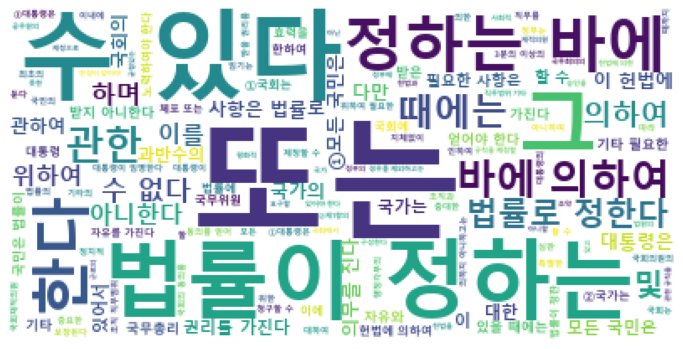

In [12]:
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis('off')
plt.savefig('./static/wordcloud.jpg')

# 그래프 이미지 저장 

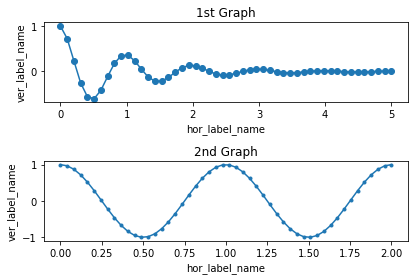

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)                # nrows=2, ncols=1, index=1
plt.plot(x1, y1, 'o-')
plt.title('1st Graph')
plt.xlabel('hor_label_name')
plt.ylabel('ver_label_name')

plt.subplot(2, 1, 2)                # nrows=2, ncols=1, index=2
plt.plot(x2, y2, '.-')
plt.title('2nd Graph')
plt.xlabel('hor_label_name')
plt.ylabel('ver_label_name')

plt.tight_layout()
# plt.show()
plt.savefig('./static/graph.jpg')